In [1]:
import numpy as np
from tifffile import imwrite
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from gvxrPython3 import gvxr

Initialise the simulation engine

In [2]:
gvxr.createOpenGLContext()

Mon Dec 15 18:12:09 2025 ---- Create window (ID: -1)
Mon Dec 15 18:12:09 2025 ---- Request an interactive OpenGL context
Mon Dec 15 18:12:09 2025 ---- Initialise GLFW
Mon Dec 15 18:12:09 2025 ---- Create an OpenGL window with a 4.3 context.
Mon Dec 15 18:12:09 2025 ---- Make the window's context current
Mon Dec 15 18:12:09 2025 ---- Initialise GLEW
Mon Dec 15 18:12:09 2025 ---- OpenGL vendor: NVIDIA Corporation
Mon Dec 15 18:12:09 2025 ---- OpenGL renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
Mon Dec 15 18:12:09 2025 ---- OpenGL version: 4.3.0 NVIDIA 580.95.05
Mon Dec 15 18:12:09 2025 ---- Use OpenGL 4.5.
Mon Dec 15 18:12:09 2025 ---- Use OpenGL Compute Shader.
Mon Dec 15 18:12:09 2025 ---- Initialise the X-ray renderer if needed and if possible


We assume values are given in cm

In [3]:
# Set the detector
gvxr.setDetectorPosition(0, 0, 5, "cm")
gvxr.setDetectorUpVector(0, 1, 0)
gvxr.setDetectorNumberOfPixels(400, 400)
gvxr.setDetectorPixelPitch(0.0125, 0.0125, "cm")

# Set the source
gvxr.setSourcePosition(0, 0, -10, "cm")
gvxr.usePointSource()

# Set the spectrum
N = 15000 # Number of incident photons
gvxr.setMonoChromaticPerPixelAtSDD(80, "keV", N)

# Set the sample
sphere_radius = 1.25
rings = 50
sectors = 50
gvxr.makeSphere("sphere", rings, sectors, sphere_radius, "cm")
gvxr.addPolygonMeshAsInnerSurface("sphere")
gvxr.setElement("sphere", "C")

Mon Dec 15 18:12:09 2025 ---- Initialise the renderer with 32 bits per floating-point numbers in GPU memory


In [4]:
xray_image = np.asarray(gvxr.computeXRayImage()) / gvxr.getUnitOfEnergy("keV")
path_length_buffer = gvxr.computePathLength("sphere")

Display the results

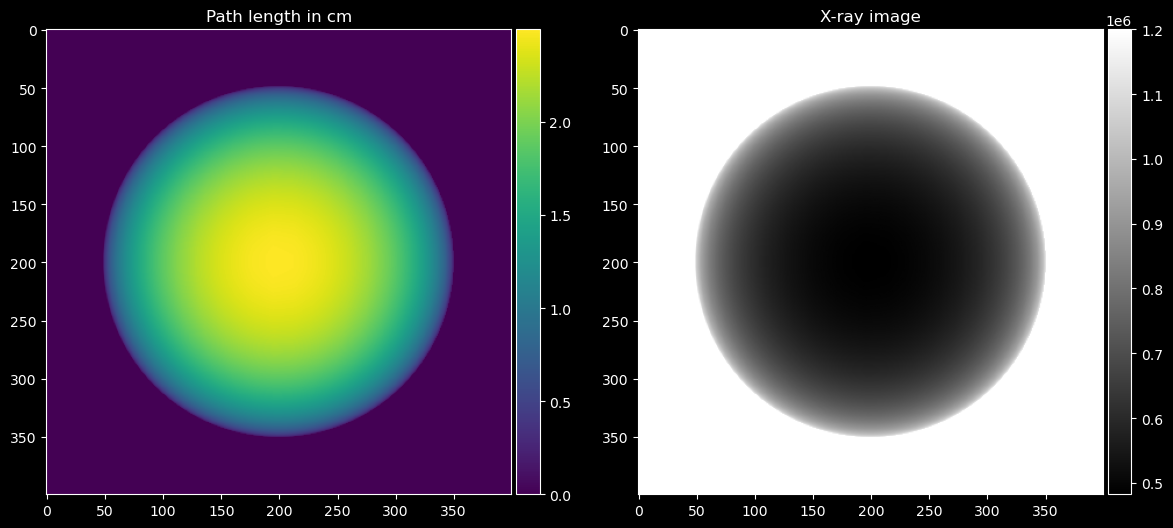

In [5]:
fig = plt.figure(figsize=(14, 12))

ax0 = fig.add_subplot(121)
ax0.set_title("Path length in cm")
im0 = ax0.imshow(path_length_buffer)
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(122)
ax1.set_title("X-ray image")
im1 = ax1.imshow(xray_image, cmap='gray')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

Save the images

In [6]:
imwrite("path_length_in_cm-gVXR.tif", path_length_buffer)
imwrite("xray_image.tif-gVXR", xray_image)